# IoT Traffic Analysis with Tranalyzer Flows

In [1]:
import sys
import os
import glob
import pandas as pd
import numpy as np
from datetime import datetime
import torch

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set()

print(f"CUDA Available: {torch.cuda.is_available()}")
time_to_date = lambda t: datetime.utcfromtimestamp(t).strftime('%Y-%m-%d %H:%M:%S')


CUDA Available: True


## Loading benign dataset

The dataset is then loadeded from tranalyzers output into a dataframe

In [2]:
print("Current Directory:" + os.getcwd())
file_pattern = '*_flows.txt' # Use all pcap files
# file_pattern = '18-06-09_flows.txt'
glob_path = os.path.join('/users/grad/fali', 'benign/tran', file_pattern)
file_list = glob.glob(glob_path)

li = []
for filepath in file_list:
    df = pd.read_csv(filepath, index_col=None, header=0, delimiter='\t')
    li.append(df)

benign_flows = pd.concat(li, axis=0, ignore_index=True)
benign_flows

Current Directory:/home/grad/fali/temp/iot-traffic-analysis/notebooks


/users/grad/fali/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,%dir,flowInd,flowStat,timeFirst,timeLast,duration,numHdrDesc,numHdrs,hdrDesc,srcMac,...,icmpTCcnt,icmpBFTypH_TypL_Code,icmpTmGtw,icmpEchoSuccRatio,icmpPFindex,connSip,connDip,connSipDip,connSipDprt,connF
0,A,159,0x0400000000004000,1.539263e+09,1.539263e+09,0.009391,1,3,eth:ipv4:tcp,7c:70:bc:5d:5e:dc,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,4,1,2,6,1.5
1,A,164,0x0400000000004001,1.539263e+09,1.539263e+09,0.000000,1,3,eth:ipv4:tcp,14:cc:20:51:33:ea,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,1,4,3,7,7.0
2,A,48,0x0400000000004000,1.539263e+09,1.539263e+09,0.013913,1,3,eth:ipv4:tcp,b4:75:0e:ec:e5:a9,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,2,1,2,2,1.0
3,B,48,0x0400000000004001,1.539263e+09,1.539263e+09,0.012026,1,3,eth:ipv4:tcp,ec:1a:59:83:28:11,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,1,2,1,1,1.0
4,A,79,0x0400000000004000,1.539263e+09,1.539263e+09,3.082847,1,3,eth:ipv4:tcp,ec:1a:59:83:28:11,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,3,1,6,6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487695,B,51301,0x0400000000004001,1.528675e+09,1.528675e+09,0.428672,1,3,eth:ipv4:tcp,14:cc:20:51:33:ea,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,1,1,1,1,1.0
4487696,A,1,0x0400000000004000,1.528589e+09,1.528675e+09,86398.660669,1,3,eth:ipv4:tcp,30:8c:fb:2f:e4:b2,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,1,1,2,2,2.0
4487697,B,1,0x0400000000004001,1.528589e+09,1.528675e+09,86397.821438,1,3,eth:ipv4:tcp,14:cc:20:51:33:ea,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,1,1,1,1,1.0
4487698,A,57,0x0000000000000044,1.528589e+09,1.528675e+09,86368.719987,1,2,eth:arp,14:cc:20:51:33:ea,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,0,0,0,0,0.0


Stored 'benign_flows' (DataFrame)


,%dir,flowInd,flowStat,timeFirst,timeLast,duration,numHdrDesc,numHdrs,hdrDesc,srcMac,...,icmpTCcnt,icmpBFTypH_TypL_Code,icmpTmGtw,icmpEchoSuccRatio,icmpPFindex,connSip,connDip,connSipDip,connSipDprt,connF
0,A,159,0x0400000000004000,1.539263e+09,1.539263e+09,0.009391,1,3,eth:ipv4:tcp,7c:70:bc:5d:5e:dc,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,4,1,2,6,1.5
1,A,164,0x0400000000004001,1.539263e+09,1.539263e+09,0.000000,1,3,eth:ipv4:tcp,14:cc:20:51:33:ea,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,1,4,3,7,7.0
2,A,48,0x0400000000004000,1.539263e+09,1.539263e+09,0.013913,1,3,eth:ipv4:tcp,b4:75:0e:ec:e5:a9,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,2,1,2,2,1.0
3,B,48,0x0400000000004001,1.539263e+09,1.539263e+09,0.012026,1,3,eth:ipv4:tcp,ec:1a:59:83:28:11,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,1,2,1,1,1.0
4,A,79,0x0400000000004000,1.539263e+09,1.539263e+09,3.082847,1,3,eth:ipv4:tcp,ec:1a:59:83:28:11,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,3,1,6,6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487693,B,51302,0x0400000000004001,1.528675e+09,1.528675e+09,0.235007,1,3,eth:ipv4:tcp,14:cc:20:51:33:ea,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,1,1,1,1,1.0
4487694,A,51301,0x0400000000004000,1.528675e+09,1.528675e+09,0.677992,1,3,eth:ipv4:tcp,ec:1a:59:83:28:11,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,1,1,2,2,2.0
4487695,B,51301,0x0400000000004001,1.528675e+09,1.528675e+09,0.428672,1,3,eth:ipv4:tcp,14:cc:20:51:33:ea,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,1,1,1,1,1.0
4487696,A,1,0x0400000000004000,1.528589e+09,1.528675e+09,86398.660669,1,3,eth:ipv4:tcp,30:8c:fb:2f:e4:b2,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,1,1,2,2,2.0


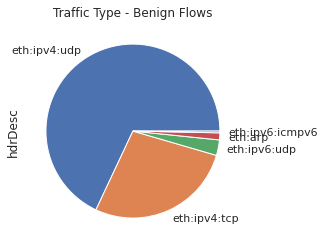

In [3]:
# Display Current Breakdown of Traffic types
hdr_desc_counts = benign_flows['hdrDesc'].value_counts().head(5)
hdr_desc_counts.plot.pie()
plt.title("Traffic Type - Benign Flows")
benign_flows = benign_flows[benign_flows['hdrDesc'].str.contains('eth:ipv4:tcp')]
%store benign_flows
benign_flows


# Loading Mixed Dataset

In [4]:
import os
import glob
print("Current Directory:" + os.getcwd())
file_pattern = '*_flows.txt' # Use all pcap files
# file_pattern = '18-06-01_flows.txt'
glob_path = os.path.join('/users/grad/fali', 'attack/tran', file_pattern)
file_list = glob.glob(glob_path)

li = []
for filepath in file_list:
    df = pd.read_csv(filepath, index_col=None, header=0, delimiter='\t')
    li.append(df)

mixed_flows = pd.concat(li, axis=0, ignore_index=True)
mixed_flows

Current Directory:/home/grad/fali/temp/iot-traffic-analysis/notebooks


/users/grad/fali/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,%dir,flowInd,flowStat,timeFirst,timeLast,duration,numHdrDesc,numHdrs,hdrDesc,srcMac,...,icmpTCcnt,icmpBFTypH_TypL_Code,icmpTmGtw,icmpEchoSuccRatio,icmpPFindex,connSip,connDip,connSipDip,connSipDprt,connF
0,A,29,0x0000000000000004,1.540040e+09,1.540040e+09,0.000000,1,2,eth:llc,f4:f5:d8:8f:0a:3c,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,0,0,0,0,0.0
1,A,30,0x0000000000000004,1.540040e+09,1.540040e+09,3.010642,1,2,eth:eapol,14:cc:20:51:33:e9,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,0,0,0,0,0.0
2,B,30,0x0000000000000005,1.540040e+09,1.540040e+09,3.009308,1,2,eth:eapol,f4:f5:d8:8f:0a:3c,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,0,0,0,0,0.0
3,A,39,0x0800000000008001,1.540040e+09,1.540040e+09,0.000000,1,3,eth:ipv6:icmpv6,14:cc:20:51:33:ea,...,1,0x00000040_0x00000000_0x0001,0x00000000,0.0,0,1,1,1,1,1.0
4,A,40,0x0000000000000004,1.540040e+09,1.540040e+09,26.554854,1,2,eth:llc,7c:70:bc:5d:5e:dc,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280664,B,82557,0x0400000000004001,1.528330e+09,1.528330e+09,0.196470,1,3,eth:ipv4:tcp,14:cc:20:51:33:ea,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,1,1,1,1,1.0
2280665,A,82558,0x0400000000004000,1.528330e+09,1.528330e+09,0.341981,1,3,eth:ipv4:tcp,f4:f5:d8:d4:eb:12,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,2,1,2,4,2.0
2280666,B,82558,0x0400000000004001,1.528330e+09,1.528330e+09,0.338983,1,3,eth:ipv4:tcp,14:cc:20:51:33:ea,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,1,2,1,3,3.0
2280667,A,82495,0x0400000000004000,1.528329e+09,1.528330e+09,120.201867,1,3,eth:ipv4:tcp,f4:f5:d8:d4:eb:12,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,1,1,2,2,2.0


,%dir,flowInd,flowStat,timeFirst,timeLast,duration,numHdrDesc,numHdrs,hdrDesc,srcMac,...,icmpTCcnt,icmpBFTypH_TypL_Code,icmpTmGtw,icmpEchoSuccRatio,icmpPFindex,connSip,connDip,connSipDip,connSipDprt,connF
39,A,75,0x0400000000004000,1.540041e+09,1.540041e+09,1.231259,1,3,eth:ipv4:tcp,00:17:88:2b:9a:25,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,5,1,2,2,0.4
40,B,75,0x0400000000004001,1.540041e+09,1.540041e+09,1.227745,1,3,eth:ipv4:tcp,14:cc:20:51:33:ea,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,1,5,1,1,1.0
52,A,88,0x0400000000004000,1.540041e+09,1.540041e+09,0.004050,1,3,eth:ipv4:tcp,00:17:88:2b:9a:25,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,5,1,2,4,0.8
53,B,88,0x0400000000004001,1.540041e+09,1.540041e+09,0.001247,1,3,eth:ipv4:tcp,14:cc:20:51:33:ea,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,1,5,1,3,3.0
82,A,111,0x0400000000004000,1.540042e+09,1.540042e+09,0.571916,1,3,eth:ipv4:tcp,00:17:88:2b:9a:25,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,6,1,4,6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280664,B,82557,0x0400000000004001,1.528330e+09,1.528330e+09,0.196470,1,3,eth:ipv4:tcp,14:cc:20:51:33:ea,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,1,1,1,1,1.0
2280665,A,82558,0x0400000000004000,1.528330e+09,1.528330e+09,0.341981,1,3,eth:ipv4:tcp,f4:f5:d8:d4:eb:12,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,2,1,2,4,2.0
2280666,B,82558,0x0400000000004001,1.528330e+09,1.528330e+09,0.338983,1,3,eth:ipv4:tcp,14:cc:20:51:33:ea,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,1,2,1,3,3.0
2280667,A,82495,0x0400000000004000,1.528329e+09,1.528330e+09,120.201867,1,3,eth:ipv4:tcp,f4:f5:d8:d4:eb:12,...,0,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,1,1,2,2,2.0


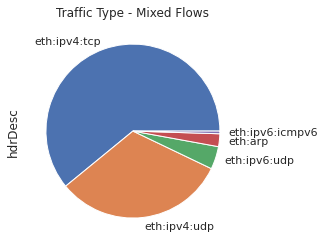

In [5]:
# Display Current Breakdown of Traffic types
hdr_desc_counts = mixed_flows['hdrDesc'].value_counts().head(5)
hdr_desc_counts.plot.pie()
plt.title("Traffic Type - Mixed Flows")

# Filter out non-tcp traffic
mixed_flows = mixed_flows[mixed_flows['hdrDesc'].str.contains('eth:ipv4:tcp')]
mixed_flows

# Known Attack Pre-processing

Note: the original 50c7bf005639.csv source file had a few extra commas that needed to be removed in order to load the csv properly.

TODO - investigate *-packet-anomaly.txt files - what are they for?

In [6]:
# Load device_info from file
mac_to_filename = lambda s: f"{s.lower().replace(':', '')}.csv"

filepath = "/users/grad/fali/temp/iot-traffic-analysis/device_info.csv"
device_info = pd.read_csv(filepath, index_col=None, delimiter=',')
device_info['annotation_file'] = device_info['mac'].map(mac_to_filename)
device_info

,mac,ip,device_type,annotation_file
0,ec:1a:59:83:28:11,192.168.1.165,WEMO Motion Sensor,ec1a59832811.csv
1,ec:1a:59:79:f4:89,192.168.1.223,WEMO Power Switch,ec1a5979f489.csv
2,00:16:6c:ab:6b:88,192.168.1.248,Samsung Camera,00166cab6b88.csv
3,50:c7:bf:00:56:39,192.168.1.227,TP Link Plug,50c7bf005639.csv
4,70:ee:50:18:34:43,192.168.1.241,Netatmo Camera,70ee50183443.csv
5,00:17:88:2B:9A:25,192.168.1.129,Huebulb,0017882b9a25.csv
6,44:65:0D:56:CC:D3,192.168.1.239,AmazonEcho,44650d56ccd3.csv
7,F4:F5:D8:8F:0A:3C,192.168.1.119,chromecast,f4f5d88f0a3c.csv
8,74:C6:3B:29:D7:1D,192.168.1.163,ihome,74c63b29d71d.csv
9,D0:73:D5:01:83:08,192.168.1.118,lifx,d073d5018308.csv


In [7]:
file_pattern = '*.csv'
glob_path = os.path.join('/users/grad/fali/temp/iot-traffic-analysis', 'annotations', file_pattern)
file_list = glob.glob(glob_path)

li = []
for filepath in file_list:
    print(f"loading {filepath}")
    df = pd.read_csv(filepath, index_col=None, delimiter=',', header=0, names=[
      'start_time', 'end_time', 'description', 'attack_type'])
    
    filename = os.path.basename(filepath)
    df['annotation_file'] = filename
    li.append(df)

all_known_attacks = pd.concat(li, axis=0, ignore_index=True)
# Convert time units to match tranalyzer
all_known_attacks.sort_values(by=['start_time'], inplace=True, ignore_index=True)
all_known_attacks["duration"] = all_known_attacks['end_time'] - all_known_attacks['start_time']

# Enrich attack meta-data with device meta-data
all_known_attacks = all_known_attacks.set_index('annotation_file').join(device_info.set_index('annotation_file'))
all_known_attacks.reset_index()

loading /users/grad/fali/temp/iot-traffic-analysis/annotations/44650d56ccd3.csv
loading /users/grad/fali/temp/iot-traffic-analysis/annotations/ec1a59832811.csv
loading /users/grad/fali/temp/iot-traffic-analysis/annotations/d073d5018308.csv
loading /users/grad/fali/temp/iot-traffic-analysis/annotations/00166cab6b88.csv
loading /users/grad/fali/temp/iot-traffic-analysis/annotations/0017882b9a25.csv
loading /users/grad/fali/temp/iot-traffic-analysis/annotations/50c7bf005639.csv
loading /users/grad/fali/temp/iot-traffic-analysis/annotations/f4f5d88f0a3c.csv
loading /users/grad/fali/temp/iot-traffic-analysis/annotations/70ee50183443.csv
loading /users/grad/fali/temp/iot-traffic-analysis/annotations/ec1a5979f489.csv
loading /users/grad/fali/temp/iot-traffic-analysis/annotations/74c63b29d71d.csv


,annotation_file,start_time,end_time,description,attack_type,duration,mac,ip,device_type
0,00166cab6b88.csv,1527835334,1527835936,Localfeatures|Allfeatures|Arpfeatures,ArpSpoof1L2D,602,00:16:6c:ab:6b:88,192.168.1.248,Samsung Camera
1,00166cab6b88.csv,1527836944,1527837544,Localfeatures|Allfeatures|Arpfeatures,ArpSpoof10L2D,600,00:16:6c:ab:6b:88,192.168.1.248,Samsung Camera
2,00166cab6b88.csv,1527860996,1527861596,localTcpPort49152|Tcpfeatures|Localfeatures|Al...,TcpSynDevice1L2D,600,00:16:6c:ab:6b:88,192.168.1.248,Samsung Camera
3,00166cab6b88.csv,1527862604,1527863204,localTcpPort49152|Tcpfeatures|Localfeatures|Al...,TcpSynDevice10L2D,600,00:16:6c:ab:6b:88,192.168.1.248,Samsung Camera
4,00166cab6b88.csv,1527864215,1527864815,localTcpPort49152|Tcpfeatures|Localfeatures|Al...,TcpSynDevice100L2D,600,00:16:6c:ab:6b:88,192.168.1.248,Samsung Camera
...,...,...,...,...,...,...,...,...,...
219,f4f5d88f0a3c.csv,1540314670,1540315270,Udpfeatures|Internetfeatures|Allfeatures|Inter...,Ssdp10W2D2W,600,F4:F5:D8:8F:0A:3C,192.168.1.119,chromecast
220,f4f5d88f0a3c.csv,1540315870,1540316470,Udpfeatures|Internetfeatures|Allfeatures|Inter...,Ssdp100W2D2W,600,F4:F5:D8:8F:0A:3C,192.168.1.119,chromecast
221,f4f5d88f0a3c.csv,1540452323,1540452924,Udpfeatures|Internetfeatures|Allfeatures|Inter...,Ssdp1W2D2W,601,F4:F5:D8:8F:0A:3C,192.168.1.119,chromecast
222,f4f5d88f0a3c.csv,1540453525,1540454125,Tcpfeatures|Internetfeatures|Allfeatures|Inter...,TcpSynReflection1W2D2W,600,F4:F5:D8:8F:0A:3C,192.168.1.119,chromecast


In [8]:
last_attack_endtime = max(all_known_attacks['end_time'])
last_flow_endtime = max(mixed_flows['timeLast'])

print(f"last known attack ended at {time_to_date(last_attack_endtime)}")
# TODO - investigate why the last attack happens on Oct 25, but there are two more days of mixed traffic (Oct 26, Oct 27)

# Filter out attacks that happened outside our current dataset scope
known_attacks = all_known_attacks[all_known_attacks['end_time'] <= last_flow_endtime]
print(f"Using {len(known_attacks)} of {len(all_known_attacks)} known attacks")

last known attack ended at 2018-10-25 10:30:48
Using 224 of 224 known attacks


# Label Attack Flows

In [9]:
# Apply IP and mac adress filters
attacker_ips = known_attacks.ip.unique()
attacker_macs = known_attacks.mac.unique()
attack_windows = [tuple(time_range) for time_range in known_attacks[['start_time', 'end_time']].values]
matches_attack_address = (mixed_flows.srcIP.isin(attacker_ips)) | (mixed_flows.srcMac.isin(attacker_macs)) #| (mixed_flows.dstIP.isin(attacker_ips)) | (mixed_flows.dstMac.isin(attacker_macs))

# Apply attack window filters (capture flows that occured within a known attack)
attack_window_filters = [((attack.start_time <= mixed_flows.timeFirst) & (attack.end_time <= mixed_flows.timeLast)) 
                         for i, attack in known_attacks.iterrows()]
in_any_attack_window = np.logical_or.reduce(attack_window_filters)

# Label traffic as attack or benign
# TODO - make sure only malicous flows are being captured by our filters

mixed_flows.loc[:, 'is_attack'] = False
mixed_flows.loc[matches_attack_address & in_any_attack_window, 'is_attack'] = True

# Flow Counts ~ Mixed: 2280669, Benign: 886931, Attack: 1393738 # Filtering using srcIP, srcMac, dstIP, dstMac
# Flow Counts ~ Mixed: 2280669, Benign: 1450957, Attack: 829712 # Filtering using srcIP, srcMac
print(f"Flow Counts ~ Mixed: {len(mixed_flows)}, Benign: {(~mixed_flows.is_attack).sum()}, Attack: {(mixed_flows.is_attack).sum()}")

# for storing mixed flows
%store mixed_flows
mixed_flows

Flow Counts ~ Mixed: 1366308, Benign: 801702, Attack: 564606
Stored 'mixed_flows' (DataFrame)


,%dir,flowInd,flowStat,timeFirst,timeLast,duration,numHdrDesc,numHdrs,hdrDesc,srcMac,...,icmpBFTypH_TypL_Code,icmpTmGtw,icmpEchoSuccRatio,icmpPFindex,connSip,connDip,connSipDip,connSipDprt,connF,is_attack
39,A,75,0x0400000000004000,1.540041e+09,1.540041e+09,1.231259,1,3,eth:ipv4:tcp,00:17:88:2b:9a:25,...,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,5,1,2,2,0.4,True
40,B,75,0x0400000000004001,1.540041e+09,1.540041e+09,1.227745,1,3,eth:ipv4:tcp,14:cc:20:51:33:ea,...,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,1,5,1,1,1.0,False
52,A,88,0x0400000000004000,1.540041e+09,1.540041e+09,0.004050,1,3,eth:ipv4:tcp,00:17:88:2b:9a:25,...,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,5,1,2,4,0.8,True
53,B,88,0x0400000000004001,1.540041e+09,1.540041e+09,0.001247,1,3,eth:ipv4:tcp,14:cc:20:51:33:ea,...,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,1,5,1,3,3.0,False
82,A,111,0x0400000000004000,1.540042e+09,1.540042e+09,0.571916,1,3,eth:ipv4:tcp,00:17:88:2b:9a:25,...,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,6,1,4,6,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280664,B,82557,0x0400000000004001,1.528330e+09,1.528330e+09,0.196470,1,3,eth:ipv4:tcp,14:cc:20:51:33:ea,...,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,1,1,1,1,1.0,False
2280665,A,82558,0x0400000000004000,1.528330e+09,1.528330e+09,0.341981,1,3,eth:ipv4:tcp,f4:f5:d8:d4:eb:12,...,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,2,1,2,4,2.0,False
2280666,B,82558,0x0400000000004001,1.528330e+09,1.528330e+09,0.338983,1,3,eth:ipv4:tcp,14:cc:20:51:33:ea,...,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,1,2,1,3,3.0,False
2280667,A,82495,0x0400000000004000,1.528329e+09,1.528330e+09,120.201867,1,3,eth:ipv4:tcp,f4:f5:d8:d4:eb:12,...,0x00000000_0x00000000_0x0000,0x00000000,0.0,0,1,1,2,2,2.0,False


# Feature Selection

In [10]:
print("Listing features with a single uniform value (no information)")
print("Feature: unique value count")
# Disabling because this takes too long
# We only needed to run this once to find non-informative features
# all_flows=pd.concat([benign_flows, mixed_flows], axis=0)
# print(all_flows.nunique()[all_flows.nunique() <= 1]) 

Listing features with a single uniform value (no information)
Feature: unique value count


In [11]:
# Features that have uniform values for our dataset
no_info_features = ['ethVlanID', 'macStat', 'minIAT', 'tcpMPAID', 'icmpTmGtw']
# Features with only 1 value for TCP traffic
tcp_no_info_features = ['numHdrDesc', 'hdrDesc', 'ethType', 'l4Proto', 
                        'ipOptCnt','ipOptCpCl_Num','ip6OptCntHH_D','ip6OptHH_D', 
                        'icmpStat','icmpTCcnt','icmpBFTypH_TypL_Code', 
                        'icmpEchoSuccRatio','icmpPFindex']

# Features which will not be used
pointless_features = ['timeFirst', 'timeLast', 'dstPort', 'srcPort', 'dstIP', 
                      'dstMac', 'srcIP', 'srcMac', 'srcMac_dstMac_numP']

# Non-decimal features categorized by data-type
hex_features = ['flowStat', 'tcpFStat', 'ipTOS', 'ipFlags', 'ethType',
                 'tcpStates', 'icmpStat', 'tcpAnomaly', 
                'tcpFlags',  'tcpMPF', 'tcpMPTBF', 'tcpMPdssF', 'tcpOptions']

string_features = ['%dir', 'hdrDesc', 'srcManuf_dstManuf', 'dstPortClass', 
                   'srcIPCC', 'dstIPCC', 'dstIPOrg', 'srcIPOrg', 'numHdrs']


# Not sure what to make of these - more research required
underscore_features = ['ipOptCpCl_Num', 'icmpBFTypH_TypL_Code', 'ip6OptHH_D', 'ip6OptCntHH_D']

# Features we will use
features = ['flowInd', 'duration', 'macPairs', 'dstPortClassN', 'numPktsSnt', 
            'numPktsRcvd', 'numBytesSnt', 'numBytesRcvd', 'minPktSz', 
            'maxPktSz', 'avePktSize', 'stdPktSize', 'pktps', 'bytps', 'pktAsm',
            'bytAsm', 'ipMindIPID', 'ipMaxdIPID', 'ipMinTTL', 'ipMaxTTL', 
            'ipTTLChg', 'tcpPSeqCnt', 'tcpSeqSntBytes', 'tcpSeqFaultCnt', 
            'tcpPAckCnt', 'tcpFlwLssAckRcvdBytes', 'tcpAckFaultCnt',
            'tcpInitWinSz', 'tcpAveWinSz', 'tcpMinWinSz', 'tcpMaxWinSz', 
            'tcpWinSzDwnCnt', 'tcpWinSzUpCnt', 'tcpWinSzChgDirCnt', 
            'tcpOptPktCnt', 'tcpOptCnt', 'tcpMSS', 'tcpWS', 'tcpTmS', 'tcpTmER', 
            'tcpEcI', 'tcpBtm', 'tcpSSASAATrip', 'tcpRTTAckTripMin', 
            'tcpRTTAckTripMax', 'tcpRTTAckTripAve', 'tcpRTTAckTripJitAve', 
            'tcpRTTSseqAA', 'tcpRTTAckJitAve', 'connSip', 'connDip', 
            'connSipDip', 'connSipDprt', 'connF',  'aveIAT', 'maxIAT', 'stdIAT',
            'tcpISeqN', 'tcpUtm', 'tcpWinSzThRt']

unused_features = no_info_features + tcp_no_info_features + pointless_features + hex_features + string_features + underscore_features
all_features = features + unused_features
labels = ['is_attack']
mixed_flows[features + labels]

# for storing features
%store features
print(f"Selected {len(features)} features")
features

Stored 'features' (list)
Selected 60 features


['flowInd',
 'duration',
 'macPairs',
 'dstPortClassN',
 'numPktsSnt',
 'numPktsRcvd',
 'numBytesSnt',
 'numBytesRcvd',
 'minPktSz',
 'maxPktSz',
 'avePktSize',
 'stdPktSize',
 'pktps',
 'bytps',
 'pktAsm',
 'bytAsm',
 'ipMindIPID',
 'ipMaxdIPID',
 'ipMinTTL',
 'ipMaxTTL',
 'ipTTLChg',
 'tcpPSeqCnt',
 'tcpSeqSntBytes',
 'tcpSeqFaultCnt',
 'tcpPAckCnt',
 'tcpFlwLssAckRcvdBytes',
 'tcpAckFaultCnt',
 'tcpInitWinSz',
 'tcpAveWinSz',
 'tcpMinWinSz',
 'tcpMaxWinSz',
 'tcpWinSzDwnCnt',
 'tcpWinSzUpCnt',
 'tcpWinSzChgDirCnt',
 'tcpOptPktCnt',
 'tcpOptCnt',
 'tcpMSS',
 'tcpWS',
 'tcpTmS',
 'tcpTmER',
 'tcpEcI',
 'tcpBtm',
 'tcpSSASAATrip',
 'tcpRTTAckTripMin',
 'tcpRTTAckTripMax',
 'tcpRTTAckTripAve',
 'tcpRTTAckTripJitAve',
 'tcpRTTSseqAA',
 'tcpRTTAckJitAve',
 'connSip',
 'connDip',
 'connSipDip',
 'connSipDprt',
 'connF',
 'aveIAT',
 'maxIAT',
 'stdIAT',
 'tcpISeqN',
 'tcpUtm',
 'tcpWinSzThRt']